## Assignment 3: $k$ Nearest Neighbor


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. Regression predicts a numeric outcome while classification predicts a categorical.
2. A confusion table is a cross tabulation of predicted and actual values. It helps us understand patterns in correct and wrong predictions.
3. Sum of squared error quantifies how far predicted values in a regression are from true values.
4. Overfitting is when the model is too complex and accounts for too much noise, while underfitting is when the model is too simple and doesn't make much prediction.
5. Splitting the data helps us pick a k that should still be optimal when applied to new data.
6. Predictions are more simple and direct but limited in scope. Probability distributions can show more nuance, giving probabilities of each class label, but are more complex in output and execution.

**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
(2499, 3)
sse k = 3 = [np.float64(64483235274.3125)]


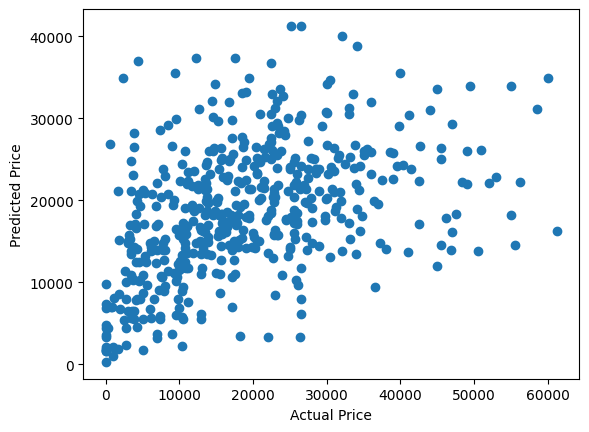

sse k = 10 = [np.float64(64483235274.3125), np.float64(57602617335.93388)]


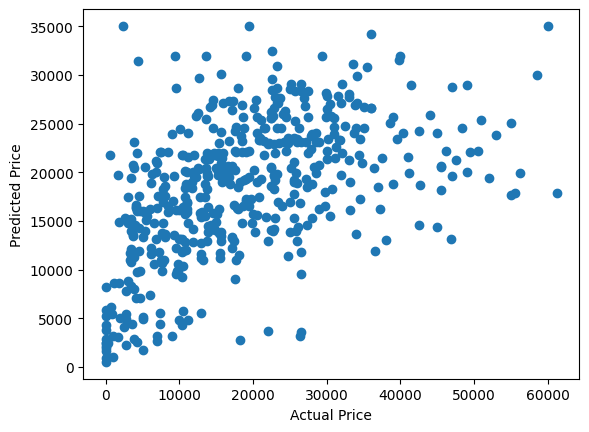

sse k = 25 = [np.float64(64483235274.3125), np.float64(57602617335.93388), np.float64(53806247885.32248)]


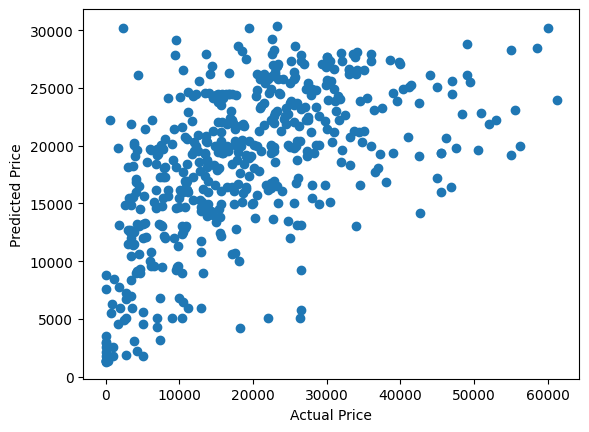

sse k = 50 = [np.float64(64483235274.3125), np.float64(57602617335.93388), np.float64(53806247885.32248), np.float64(52618536873.65744)]


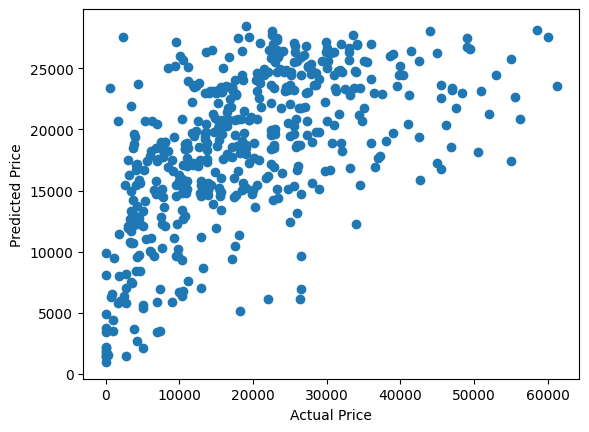

sse k = 100 = [np.float64(64483235274.3125), np.float64(57602617335.93388), np.float64(53806247885.32248), np.float64(52618536873.65744), np.float64(52631672581.630135)]


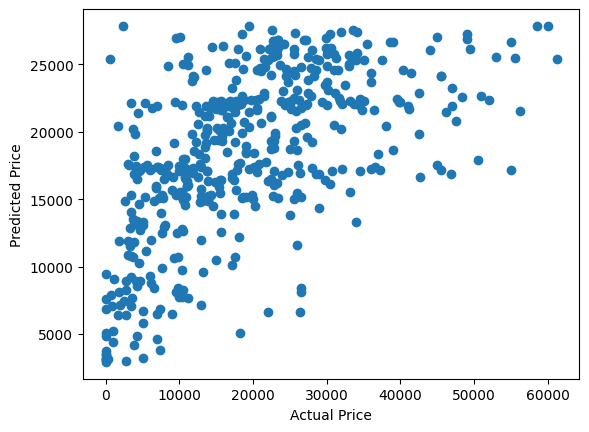

sse k = 300 = [np.float64(64483235274.3125), np.float64(57602617335.93388), np.float64(53806247885.32248), np.float64(52618536873.65744), np.float64(52631672581.630135), np.float64(55125128203.598434)]


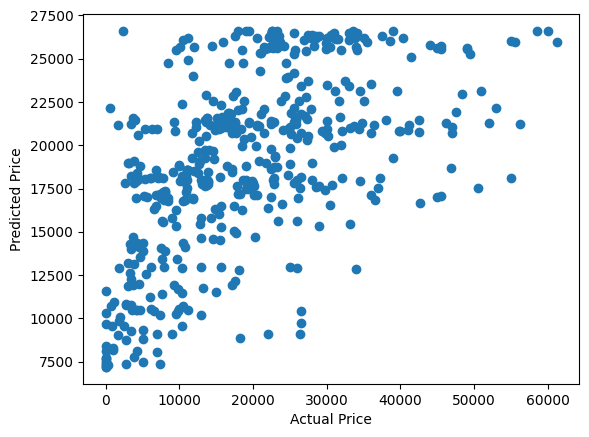

optimal k is: 100


In [348]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

#1
df = pd.read_csv('/data/USA_cars_datasets.csv')
df=df[['price', 'year', 'mileage']]
print(df.head())
print(df.shape)
#no NA's

#2
df[['year','mileage']]= df[['year','mileage']].apply(lambda x: (x-x.min())/(x.max()-x.min()))

#3
x_train, x_test, y_train, y_test = train_test_split(df[['year','mileage']], df['price'], test_size = .2)

#4
sse = []
k_list = [3,10,25,50,100,300]
for k in k_list:
  model = KNeighborsRegressor(n_neighbors=k+1)
  fitted_model = model.fit(x_train, y_train)
  y_hat = fitted_model.predict(x_test)
  error = np.sum((y_hat-y_test)**2)
  sse.append(error)
  print('sse k =', k, '=', sse)
  plt.scatter(y_test, y_hat)
  plt.ylabel('Predicted Price')
  plt.xlabel('Actual Price')
  plt.show()
#as k increased, the range of predicted prices decreased and the graph was flattened at the top.

#5 k = 100 is optimal
sse_min = np.min(sse)
min_index = np.where(sse==sse_min)
k_star = k_list[(min_index[0][0])+1]
print("optimal k is:", k_star)

#6 As k increased, it began to underfit the data so the variance from the highest priced cars was seen more as an outlier and excluded from the prediction model.

**Q3.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

In [353]:
#1
zoo = pd.read_csv('/data/zoo.csv')

print(zoo['class'].value_counts())
for each in zoo['class'].unique():
  print('class:', each, '\n')
  print(zoo[zoo['class']==each].head(),'\n')
#different numbers in each class, each class mostly has same characteristics besides a couple outliers each.
#milk predicts class 1, class 4 by fins, class 2 by feathers, class 7 by no backbone, not airborne, class 6 by breathing and 6 legs, class 5 by breathing and aquatic, class 3 by predator without tooth.

#2
X = zoo.drop(['animal','class'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(X, zoo['class'], test_size = .5)

#3 using k* = sqrt(N) = 10
model = KNeighborsClassifier(n_neighbors=10)
fitted_model = model.fit(x_train, y_train)
y_hat = fitted_model.predict(x_test)

#4
print(pd.crosstab(y_test,y_hat))
#Missing classes 5 and 7 despite being in the sample, but pretty accurate for the included class.
#Classes 5 and 7 don't have distinct markers like some of the other classes so probably harder to classify.
y_train.value_counts()

#5
X2 = X[['milk', 'aquatic', 'airborne']]
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, zoo['class'], test_size = .5)
model2 = KNeighborsClassifier(n_neighbors=10)
fitted_model2 = model.fit(x_train2, y_train2)
y_hat2 = fitted_model2.predict(x_test2)
print(pd.crosstab(y_test2,y_hat2))
y_hat_probs = fitted_model2.predict_proba(x_test2.values)
print(y_hat2)
#this time missing classes 5 and 6. True predictions for 1 and 2 but a lot of false predictions of 4 and 7.
#all classes represented in probabilities but low probabilites that don't accurately predict certain classes.


class
1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: count, dtype: int64
class: 1 

     animal  hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0  aardvark     1         0     0     1         0        0         1        1   
1  antelope     1         0     0     1         0        0         0        1   
3      bear     1         0     0     1         0        0         1        1   
4      boar     1         0     0     1         0        0         1        1   
5   buffalo     1         0     0     1         0        0         0        1   

   backbone  breathes  venomous  fins  legs  tail  domestic  catsize  class  
0         1         1         0     0     4     0         0        1      1  
1         1         1         0     0     4     1         0        1      1  
3         1         1         0     0     4     0         0        1      1  
4         1         1         0     0     4     1         0        1      1  
5         1         1   

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform
$$
k(z) = \begin{cases}
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is
$$
k(z) = \begin{cases}
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

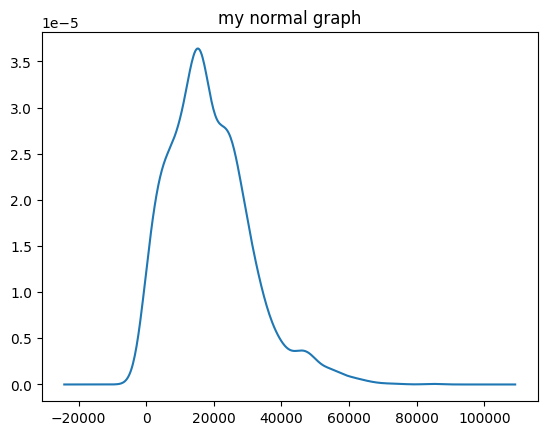

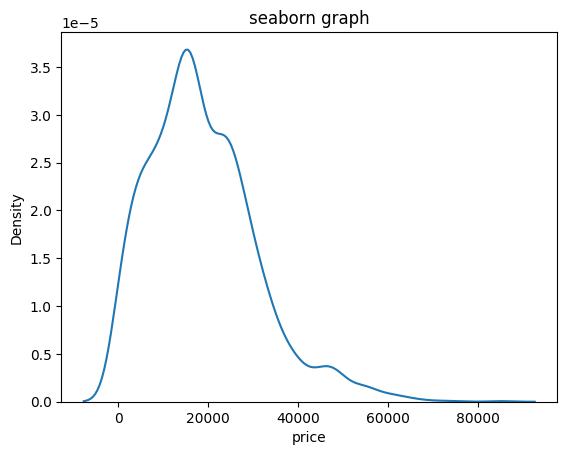

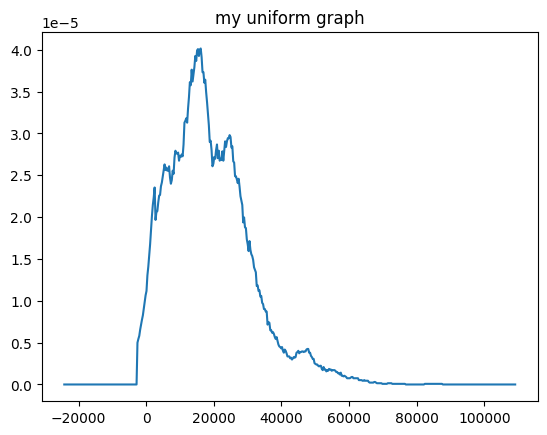

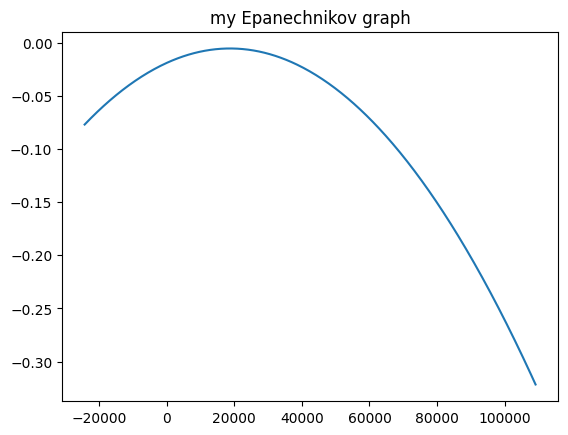

In [354]:
price = df['price']
def kde(s, kernel = 'gaussian', bandwidth = None):
  x = s.to_numpy()
  kde = 0
  sd = np.std(x)
  N = len(x)
  min_x = np.min(x)
  max_x = np.max(x)
  m = 500
  grid = np.linspace(min_x-2*sd,max_x+2*sd,m)
  if bandwidth == None:
    bandwidth = 1.06*sd*N**(-1/5)

  for i in range(N):
    if kernel == 'gaussian':
      density = np.exp(-(((grid-x[i])/bandwidth)**2)/2)/(bandwidth*np.sqrt(2*np.pi))
      kde += density

    elif kernel == 'uniform':
      density = (np.abs((grid-x[i])/bandwidth)<=1)*.5/bandwidth
      kde += density

    elif kernel == 'Epanechnikov':
      if (np.abs((grid-x[i])/bandwidth)<=1).any():
        density = (.75*(1-((grid-x[i])/bandwidth)**2))/bandwidth
        kde += density
  kde = kde/N
  sns.lineplot(x = grid, y = kde)
kde(price)
plt.title('my normal graph')
plt.show()

sns.kdeplot(price)
plt.title('seaborn graph')
plt.show()

kde(price, kernel = 'uniform')
plt.title('my uniform graph')
plt.show()

kde(price, kernel = 'Epanechnikov')
plt.title('my Epanechnikov graph')
plt.show()
